### This is a vignette on how to use the singletCode package

In [1]:
# Install singletCode package

!pip3 install singletCode

from singletCode import check_sample_sheet, get_singlets

  Using cached singletCode-1.1.0-py3-none-any.whl.metadata (4.3 kB)
Using cached singletCode-1.1.0-py3-none-any.whl (10 kB)


In [3]:
# Read in input sheet
import pandas as pd
path = "path/to/downloaded/and/unzipped/data/file"
pathToInputSheet = f"{path}/inputFiles/JiangEtAlSubset_InputSheet.csv"
df = pd.read_csv(pathToInputSheet)

In [4]:
# Check formatting of input sheet
check_sample_sheet(df)

The sample sheet provided can be used as input to get_singlets to get a list of singlets identified.


In [5]:
# Identify singlets from input sheet
outputPath = f"path/to/folder/to/store/output/"
cellLabelList, stats = get_singlets(df, dataset_name= "JiangEtAlSubset", save_all_singlet_categories = True, output_path=outputPath)

#Saving the stats and the singlet list
stats.to_csv(f"{outputPath}/JiangEtAlSubset_stats.csv")
cellLabelList[cellLabelList['label'] == "Singlet"].to_csv(f"{outputPath}/JiangEtAlSubset_singletList.csv")

INFO: Raw data counts: 
sample
1    1306
Name: count, dtype: int64
Total cells for sample 1: 39
INFO: Using ratio based filtering.
Current Sample Adjusted UMI cutoff: 2


100%|██████████| 122/122 [00:00<00:00, 38147.09it/s]

All singlets identified with multiple barcodes are unique? True
Total Singlets: 10
Total Multiplets: 9


In [6]:
stats

,single_sample_barcode_singlets,multi_barcode_singlets,dominant_umi_barcode_singlets,total_singlets,total_undetermined,low_umi_cells_removed,total_cells,dataset,sample
0,6,2,2,10,9,20,39,JiangEtAlSubset,1


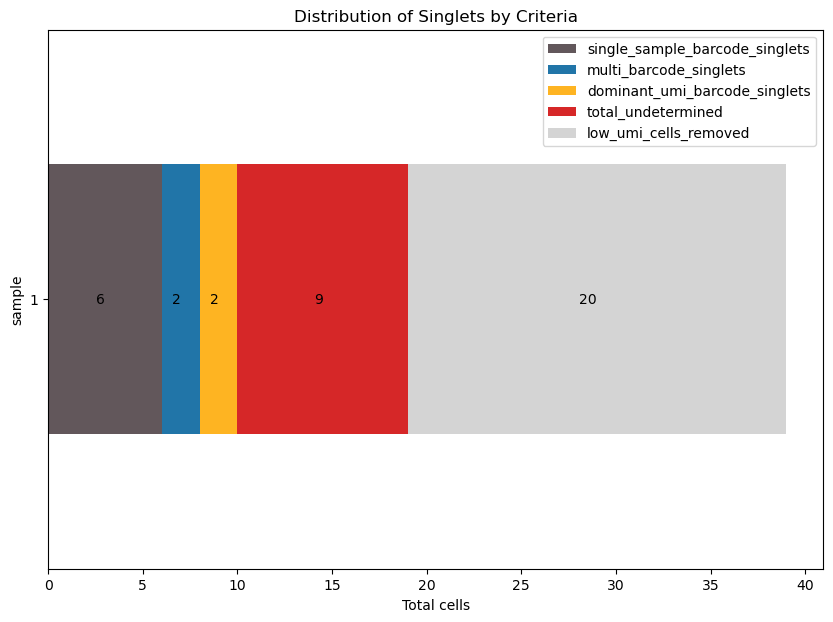

In [7]:
import matplotlib.pyplot as plt
#Plotting the distribution of low UMI cells, different kinds of singlets, and undetermined cells.
colors = ['#62575b', '#2175a8', '#feb422', '#d62728', '#d4d4d4']  # Example colors, modify as needed
plotData = stats.set_index('sample', inplace=False).drop(columns = ['dataset', 'total_cells', "total_singlets"])

# Plotting
ax = plotData.plot(kind='barh', stacked=True, figsize=(10, 7), color=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()/2), ha='right', va='center')

ax.set_xlabel('Total cells')
ax.set_title('Distribution of Singlets by Criteria')
plt.show()


The above plot shows that the data we had contained different kind of singlets: 6 single-barcode cells, 2 cells which had more than one barcode but with same combination being present in more than one cell, 2 cells that had one dominant barcode. The data also contained 9 cells which singletCode could not determine as being truly singlets and 20 cells whose barcode UMI counts were below the set threshold.

In [8]:
#Understanding the output files
import pandas as pd
df[df['cellID'] == 'TGTAAGCGTCTCGCGA'].groupby(['cellID', 'barcode', 'sample']).size().reset_index(name='count').sort_values('count', ascending=False).reset_index(drop=True)

,cellID,barcode,sample,count
0,TGTAAGCGTCTCGCGA,ATTGTTGTTGCAGATGCAGTTGATGCTGATGAAGTTGTACAAGGTC...,1,99
1,TGTAAGCGTCTCGCGA,ATTCGACTTGATCTTCTAGAACATGGTGAACTAGCAGGTGCTGATC...,1,7
2,TGTAAGCGTCTCGCGA,ATACTAGCTCAAGCAGTACTACTACTTCGTCTTCATGCAGAACAAC...,1,6
3,TGTAAGCGTCTCGCGA,ATAGATGCACTTGGTGGTCGAGTTCTAGTTGTAGCTGATCGTCCAG...,1,6
4,TGTAAGCGTCTCGCGA,ATTCGACCAGAACCACATGCAGTTCAACGTGTTCGAGGTGTAGATG...,1,6
...,...,...,...,...
82,TGTAAGCGTCTCGCGA,ATAGTAGTAGCTGTTGGTGTTGAAGTACTTCCTCTTGCTCCTCGTG...,1,1
83,TGTAAGCGTCTCGCGA,ATAGTAGATGAACGTCCTCTACATGTTCTTCGTCAAGTACCAGCAC...,1,1
84,TGTAAGCGTCTCGCGA,ATAGTACATGGTGGACCTGGACTTCGAGATGGAGCTCTTGTTCCTG...,1,1
85,TGTAAGCGTCTCGCGA,ATAGGAGTAGTTGGTGATGGTCTACCAGAAGGTGAAGGTGGAGAAG...,1,1


In [9]:
(df[df['cellID'] == 'AGGCTGCTCTTTCCGG']
 .groupby(['cellID', 'barcode', 'sample'])
 .size()
 .reset_index(name='count')
 .sort_values('count', ascending=False)
 .query('count >= 2')
 .reset_index(drop=True)
)

,cellID,barcode,sample,count
0,AGGCTGCTCTTTCCGG,ATAGGAGTAGTTGGTGATGGTCTACCAGAAGGTGAAGGTGGAGAAG...,1,13
1,AGGCTGCTCTTTCCGG,ATTGAACGTGGAGTTGAACTTGTACTACGAGTACGTCTAGAACATG...,1,2


In [10]:
(df[df['cellID'] == 'GAGGGATGTAACATCC']
 .groupby(['cellID', 'barcode', 'sample'])
 .size()
 .reset_index(name='count')
 .sort_values('count', ascending=False)
 .query('count >= 2')
 .reset_index(drop=True)
)

,cellID,barcode,sample,count
0,GAGGGATGTAACATCC,ATAGGAGTAGTTGGTGATGGTCTACCAGAAGGTGAAGGTGGAGAAG...,1,12
1,GAGGGATGTAACATCC,ATTGAACGTGGAGTTGAACTTGTACTACGAGTACGTCTAGAACATG...,1,2


In [12]:
#Install scanpy for further single-cell RNAseq analysis
!pip install scanpy[leiden]
#Import scanpy
import scanpy as sc

In [14]:
#Reading the scRNAseq data in h5ad format
adata = sc.read_h5ad(f"{path}/inputFiles/JiangEtAlSubset_scRNAseqData.h5ad")
adata

AnnData object with n_obs × n_vars = 39 × 36601
    var: 'gene_ids', 'feature_types'

In [15]:
#Making copies of singletCode input/output to use them along with scRNAseq data. The -1 is added to cell IDs to match the cell IDs seen in 10x format data. It may not be needed for your actual data.
singleCellDf = df.copy()
singleCellDf['cellID'] = singleCellDf['cellID'] + "-1"
singleCellDf = singleCellDf.drop_duplicates(subset = 'cellID')
cellLabelListSingleCell = cellLabelList.copy()
cellLabelListSingleCell['cellID'] = cellLabelListSingleCell['cellID'] + "-1"
cellLabelListSingleCell = cellLabelListSingleCell.drop_duplicates(subset='cellID').reset_index(drop = True)

In [16]:
# Note that in this vignette we are not doing any actual QC - but in actual analysis, it would need to be done.
sc.pp.calculate_qc_metrics(adata, inplace=True)

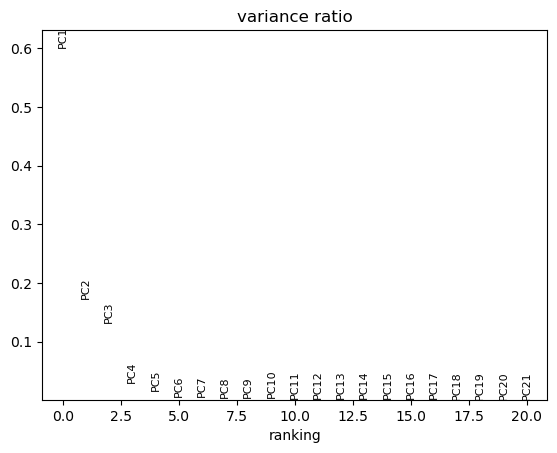

In [17]:
#Calculating PCA for the data and plotting variance ratio
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=20)

In [18]:
#Identifying cells that were thresholded by singletCode as low UMI by identifying cells that were in the original list provided to singletCode but not labeled as either singlet or undetermined
umiCutoff = pd.DataFrame(
    singleCellDf.loc[~singleCellDf['cellID'].isin(cellLabelListSingleCell['cellID']), 'cellID']
    .drop_duplicates()
    .reset_index(drop=True), 
    columns=['cellID']
)
umiCutoff['label'] = "Low UMI"

In [19]:
cellIDLabels = cellLabelListSingleCell.drop(columns = ['barcode', 'sample', 'nUMI']).drop_duplicates().reset_index(drop = True)

In [20]:
#Creating a list of cell IDs with annotation of whether singlet, multiplet or low UMI.
labelID = pd.concat([umiCutoff, cellIDLabels]).reset_index(drop=True)
labelID = labelID.set_index(labelID['cellID']).drop(columns = ['cellID'])
#Adding the labels to cells in the adata to visualise it
adata.obs["singletStatus"] = labelID

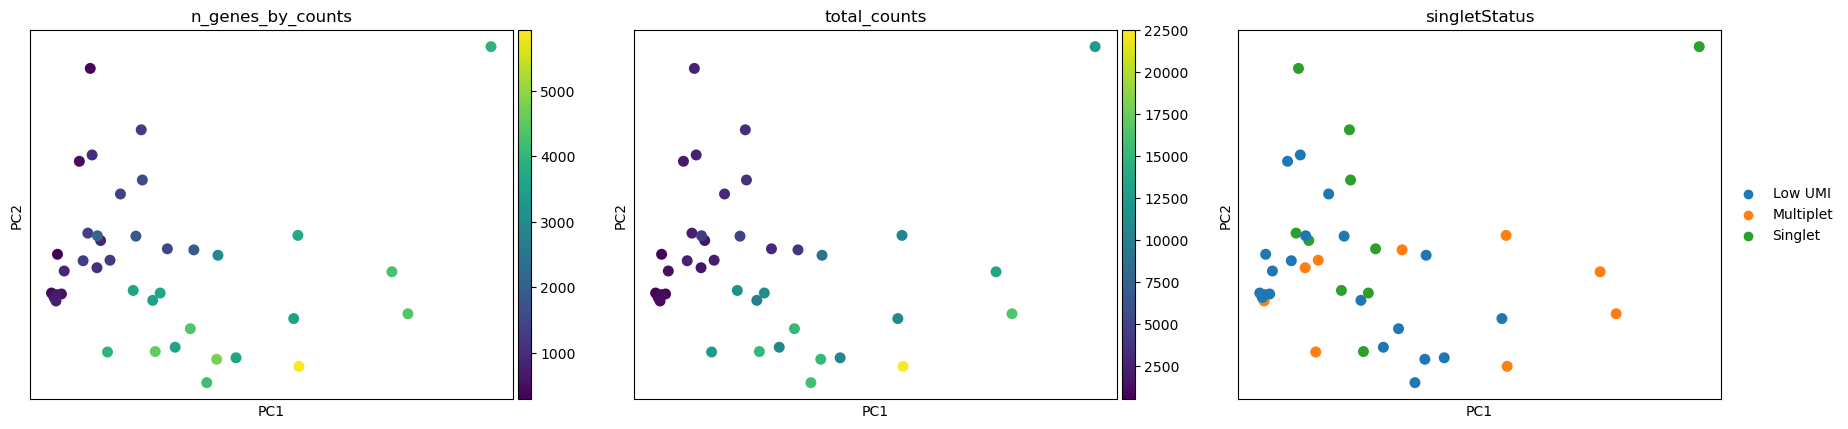

In [21]:
sc.pl.pca(
    adata,
    color = ['n_genes_by_counts', 'total_counts', 'singletStatus'],
    size = 250
)

In [22]:
#Calculating neighbours and UMAP from that for further visualization
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/mzo5929/miniforge3/envs/websiteFinalTest/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


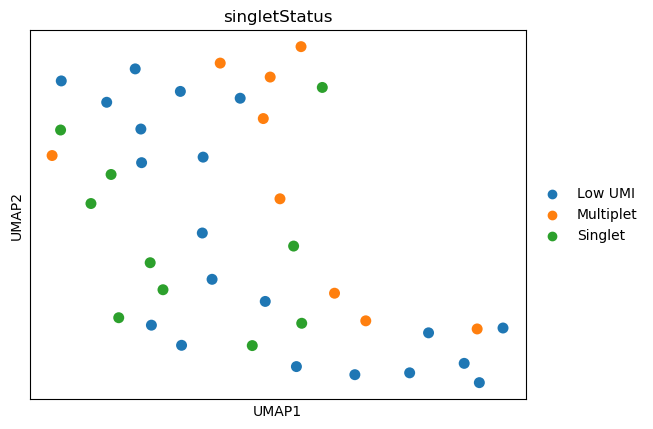

In [23]:
sc.pl.umap(
    adata,
    color=['singletStatus'],
    size=250,
)

In [24]:
#Saving the adata with all the final data
adata.write(f"{outputPath}/JiangEtAlSubset.h5ad")